# set things up and get the data

In [29]:
%%time
from Startup import *
from matplotlib import pyplot as plt
import numpy as np
# import scipy
from scipy.stats import zscore

%matplotlib inline
# df = sqlContext.sql("SELECT * FROM parquet.`s3://philipp-ghcnd/GHCND_WT08_1960_2020_US.parquet`")
df = sqlContext.sql("SELECT * FROM parquet.`/mnt/d/02_acads/3.SP-20/dsc291/Public-DSC291/Data/GHCND_WT08_1960_2020_US.parquet/`")
pdf = df.toPandas()

CPU times: user 406 ms, sys: 78.1 ms, total: 484 ms
Wall time: 1.74 s


## I exported the dataframe in string data type because that's the only thing that worked, so convert back...

In [30]:
# pdf.iloc[100:104]
pdf.describe()
# len(list(pdf.iloc[1]['Values'].split(',')))
# pdf.iloc[1]['Values']

,Station,year,Values
count,32295,32295,32295
unique,1794,61,30996
top,USW00014847,2012,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
freq,61,910,24


In [ ]:
%%time
from ast import literal_eval
pdf['Values'] = pdf['Values'].apply(literal_eval) # think I saved it as string

In [33]:

print(pdf.head())

wt08_graphs=[]
for i in range(pdf.shape[0]):
    wt08_graphs.append(pdf.iloc[i,2])
wt08_graphs=np.stack(wt08_graphs)

print(wt08_graphs.shape)

       Station  year                                             Values
0  USW00014735  1968  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...
1  USW00014735  1969  [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2  USW00014735  1970  [0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, ...
3  USW00014735  1971  [0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...
4  USW00014735  1972  [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...
(32295, 365)


## compute num of stations by year  and Mean number of days smog was reported

In [73]:
years = np.unique(pdf['year'])

In [70]:
%%time
wt08_count_byyear =[]
num_stations_byyear= []
for year in years:
    wt08_count_thisyear = []
    station_count_thisyear = 0
    for i in range(wt08_graphs.shape[0]):
        if pdf['year'][i] == year:
            station_count_thisyear +=1
            wt08_thisyear.append(wt08_graphs[i,:])
            wt08_count_thisyear.append(np.sum(wt08_graphs[i,:]))
    wt08_count_byyear.append(np.mean(wt08_count_thisyear))
    num_stations_byyear.append(station_count_thisyear)

CPU times: user 52.2 s, sys: 234 ms, total: 52.5 s
Wall time: 1min 3s


In [84]:
print(wt08_count_byyear)
print(np.sum(num_stations_byyear)) # for verification

[56.67321178120617, 54.88857142857143, 54.3014888337469, 64.17402945113788, 80.40719696969697, 91.02307692307693, 97.201171875, 100.5774647887324, 92.35039370078741, 99.33140655105973, 106.9957627118644, 99.6854219948849, 101.46493506493506, 98.95417789757413, 94.12162162162163, 101.11079545454545, 88.66101694915254, 83.84636118598382, 97.67560321715818, 92.01675977653632, 81.14420062695925, 83.42721518987342, 80.81063122923588, 76.27210884353741, 74.4920634920635, 68.11538461538461, 72.69452449567723, 72.05949008498584, 59.744680851063826, 69.20980926430518, 57.41160220994475, 54.42089552238806, 56.34757834757835, 53.46388888888889, 52.78611111111111, 52.055865921787706, 51.675070028011206, 45.566473988439306, 52.35674157303371, 42.51052631578948, 43.32338308457712, 44.88143176733781, 45.30022573363431, 44.82993197278912, 44.7728285077951, 55.749445676274945, 83.69804822043628, 93.99888392857143, 86.61590145576707, 72.37374860956618, 69.06710671067107, 67.14365881032548, 47.8571428571

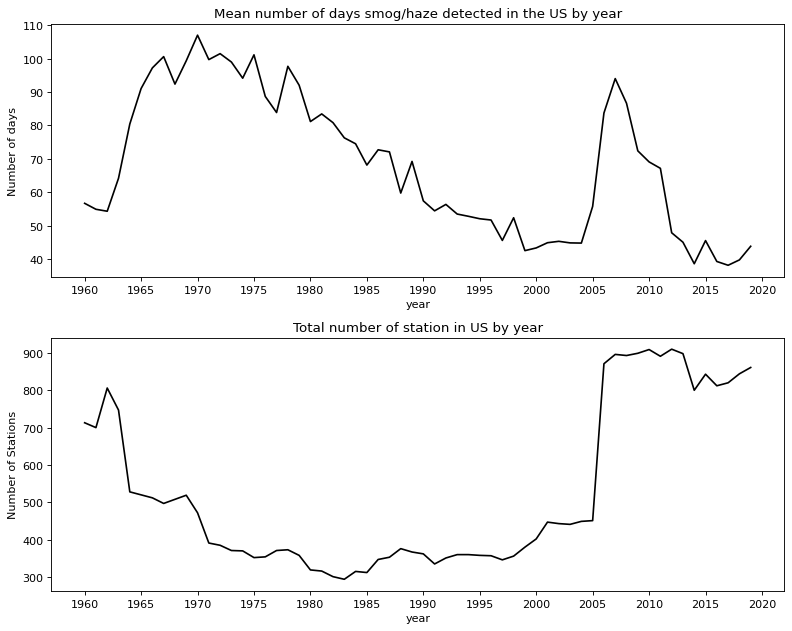

In [82]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(211)
years = map(lambda x: int(x), years)
years = list(years)
ax1.plot(years[:-1],wt08_count_byyear[:-1],color='black',linestyle='-')
ax1.set_title('Mean number of days smog/haze detected in the US by year')
ax1.set_ylabel('Number of days')
ax1.set_xlabel('year')
plt.xticks(np.arange(min(years), max(years)+1, 5.0))
# fig.autofmt_xdate()

ax2 = plt.subplot(212)
# ax1 = fig1.add_axes([0,1,1,1])
ax2.plot(years[:-1],num_stations_byyear[:-1],color='black',linestyle='-')
ax2.set_title('Total number of station in US by year')
ax2.set_ylabel('Number of Stations')
ax2.set_xlabel('year')
plt.xticks(np.arange(min(years), max(years)+1, 5.0))
plt.tight_layout() 

The spike in 2005 is correlated to sudden increase in number of stations. My hypothesis is that most of these new stations are were located in smog area. Maybe?
However it does not explain the drop after 2012.

## compute means by year

In [39]:
%%time
wt08_byyear=[]
wt08_yearmean = []
years = np.unique(pdf['year'])
for year in years:
    wt08_thisyear = []
    for i in range(wt08_graphs.shape[0]):
        if pdf['year'][i] == year:
            wt08_thisyear.append(wt08_graphs[i,:])
    wt08_byyear.append(np.mean(wt08_thisyear, axis=0))
    wt08_yearmean.append(np.mean(wt08_thisyear))
wt08_byyear=np.stack(wt08_byyear)
print(wt08_byyear.shape)

(61, 365)
CPU times: user 48.7 s, sys: 156 ms, total: 48.9 s
Wall time: 57.3 s


## plot overall mean by year 

Text(0.5, 0, 'year')

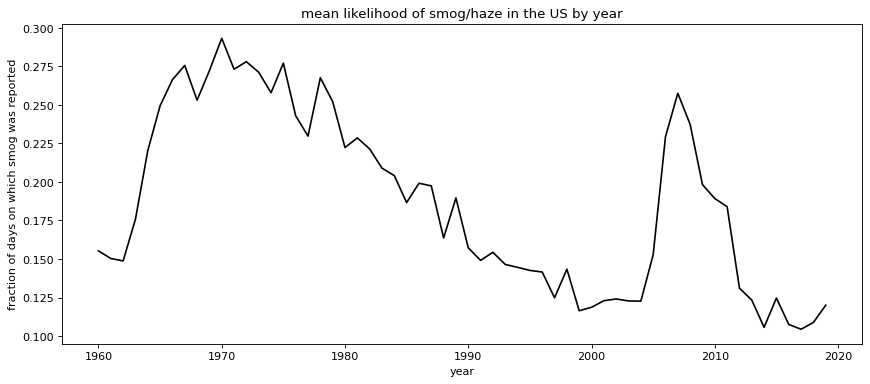

In [85]:
fig1 = plt.figure(figsize=(10, 4), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig1.add_axes([0,0,1,1])
ax1.plot(years[:-1],wt08_yearmean[:-1],color='black',linestyle='-')
ax1.set_title('mean likelihood of smog/haze in the US by year')
ax1.set_ylabel('fraction of days on which smog was reported')
ax1.set_xlabel('year')

## plot by day

In [86]:
wt08_byyear_mean = np.mean(wt08_byyear[:-1,:], axis=0)
wt08_byyear_std = np.std(wt08_byyear[:-1,:], axis=0)

In [87]:
from matplotlib import cm
colmap = cm.get_cmap('jet', len(years)-1)
colors = colmap(range(len(years)-1))

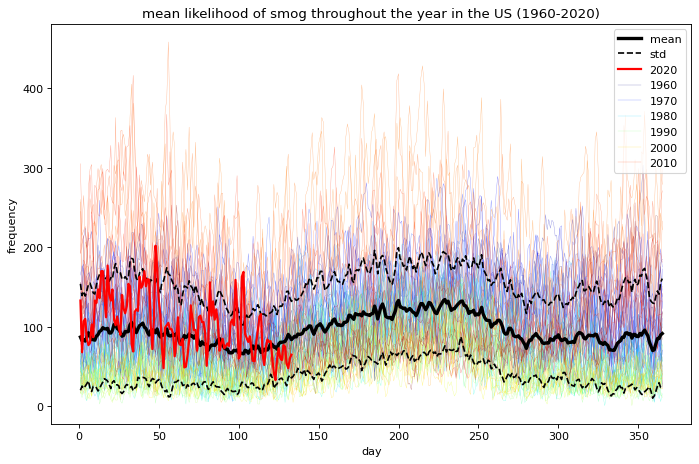

In [88]:
fig2 = plt.figure(figsize=(8, 5), dpi= 80, facecolor='w', edgecolor='k')
ax2 = fig2.add_axes([0,0,1,1])
theLines = []
for i in range(len(years)-1):
    yrplot, = ax2.plot(np.arange(1,366),wt08_byyear[i,:],color=colors[i,:3],alpha=0.5,lw=0.3,label=str(years[i]))
    if int(years[i]) % 10 == 0:
        theLines.append(yrplot)
stdplot, = ax2.plot(np.arange(1,366),wt08_byyear_mean+wt08_byyear_std,color='black',linestyle='--',label='std')
ax2.plot(np.arange(1,366),wt08_byyear_mean-wt08_byyear_std,color='black',linestyle='--')
meanplot, = ax2.plot(np.arange(1,366),wt08_byyear_mean,color='black',lw=3,label='mean')
mean2020, = ax2.plot(np.arange(1,134),wt08_byyear[-1,:133],color='red',alpha=1,lw=2,label='2020')
ax2.set_title('mean likelihood of smog throughout the year in the US (1960-2020)')
ax2.set_ylabel('frequency')
ax2.set_xlabel('day')
allLines = [meanplot, stdplot, mean2020]
for i in range(len(theLines)):
    allLines.append(theLines[i])
ax2.legend(handles=allLines)

# Z-test

In [96]:
wt08_2020 = wt08_byyear[-1,:133]
wt08_2020.shape
wt08_byyear_mean.shape
wt08_byyear_std.shape

z_values = ( wt08_2020 - wt08_byyear_mean[:len(wt08_2020)] ) / wt08_byyear_std[:len(wt08_2020)] 

In [106]:
z_values.shape

(133,)

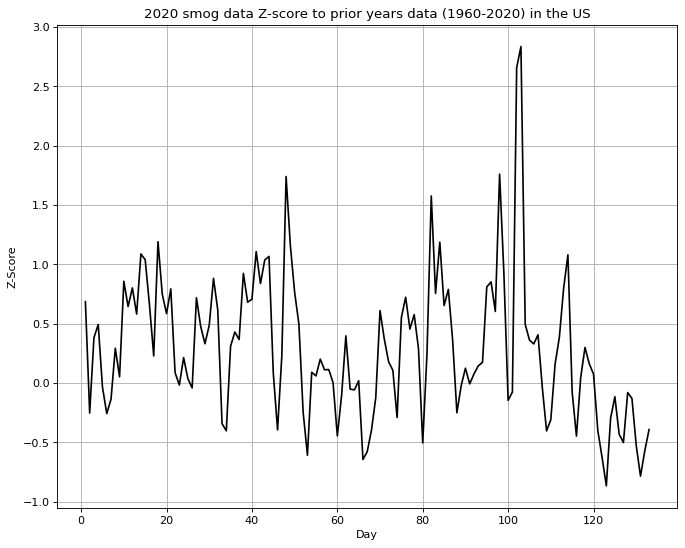

In [118]:
fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
days = np.arange(1,len(z_values)+1, 1)
ax.plot(days,z_values,color='black',linestyle='-')
ax.set_title('2020 smog data Z-score to prior years data (1960-2020) in the US')
ax.set_ylabel('Z-Score')
ax.set_xlabel('Day')
ax.grid()
# ax.set_xticks(np.arange(min(days), max(days)+1, 5.0))